#**Prediction of Product Sales**




#Project 1 - Parts 1 & 2


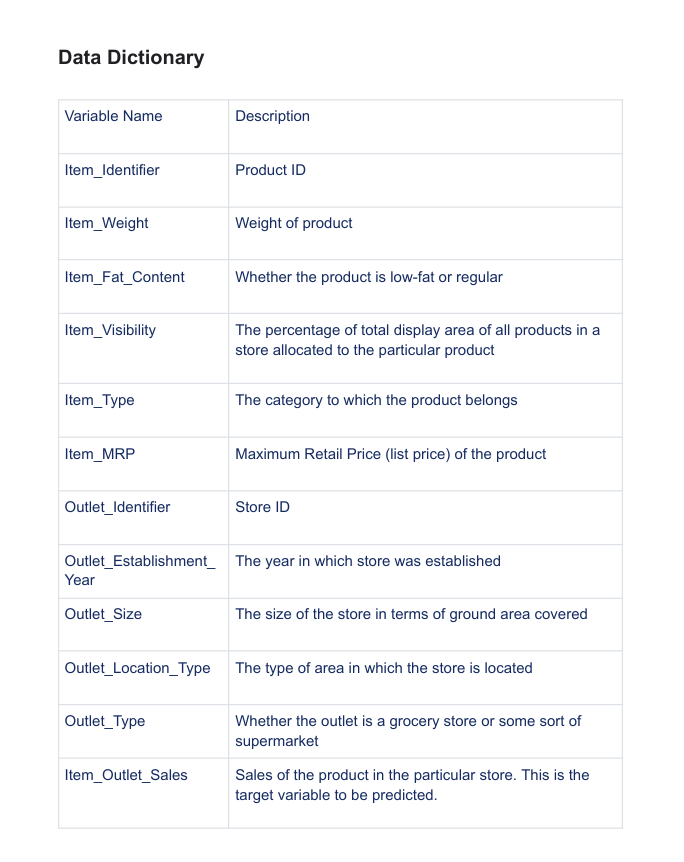.describe()*italicized text*

#Loading Data


In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
fpath = "/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df = pd.read_csv(fpath)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#Data Cleaning

In [81]:
# 1) How many rows and columns?
df.shape

(8523, 12)

In [82]:
# 2) What are the datatypes of each variable?
df.dtypes

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


In [83]:
# 3) Are there duplicates? If so, drop any duplicates.
duplicates = df.duplicated().sum()
duplicates


0

In [84]:
df_cleaned = df.drop_duplicates()
df_cleaned

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [85]:
# 4) Identify missing values.

missing_values = df.isnull().sum()
missing_values

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [86]:
# 5) Address the missing values by using a placeholder value.

df['Item_Weight'].fillna('0', inplace = True)
df['Outlet_Size'].fillna('MISSING' , inplace = True)


<ipython-input-86-6f47ad2cc0de>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Weight'].fillna('0', inplace = True)
<ipython-input-86-6f47ad2cc0de>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['Item_Weight'].fillna('0', inplace = True)
<ipython-input-86-6f47ad2cc0de>:4: FutureWarning: A value is trying to be set on a copy of a DataFram

In [87]:
# 6) Confirm that there are no missing values after addressing them.


missing_values = df.isnull().sum()
missing_values

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [88]:
# 7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).
for col in ['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']:
  print(col)
  print(df[col].unique())



Item_Fat_Content
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Item_Type
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Size
['Medium' 'MISSING' 'High' 'Small']
Outlet_Location_Type
['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [89]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.upper()  # Convert to uppercase
df['Item_Fat_Content'].unique()

array(['LOW FAT', 'REGULAR', 'LF', 'REG'], dtype=object)

In [90]:
# 8) For any numerical columns, obtain the summary statistics of each (min, max, mean).
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
summary_stats = df[numerical_columns].describe()
summary_stats_custom = df[numerical_columns].agg(['min', 'max', 'mean'])
summary_stats_custom

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
min,0.000000,31.290000,1985.000000,33.290000
max,0.328391,266.888400,2009.000000,13086.964800
mean,0.066132,140.992782,1997.831867,2181.288914


# Project 1 - Part 3

For Part 3, your task is to create exploratory visuals that might help you understand, explain, or model your data. This must include at least one of each:



*  Histograms to view the distributions of numerical features in your dataset.
*  Boxplots to view statistical summaries of numerical features in your dataset.
* Countplots to view the frequency of each class of categorial features in your dataset.

* Heatmap to view the correlation between features.





Start updating the README file associated with the project.

Add text describing the project.
Select two key visuals of different types that demonstrate a relevant insight into the data. Add text with a brief (1 sentence is sufficient) interpretation of the visuals you include.

# Exploratory Visuals & Analysis


In [91]:
# Checking info again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   object 
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 799.2+ KB


In [92]:
num_cols = df.select_dtypes('number').columns
num_cols

Index(['Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year',
       'Item_Outlet_Sales'],
      dtype='object')

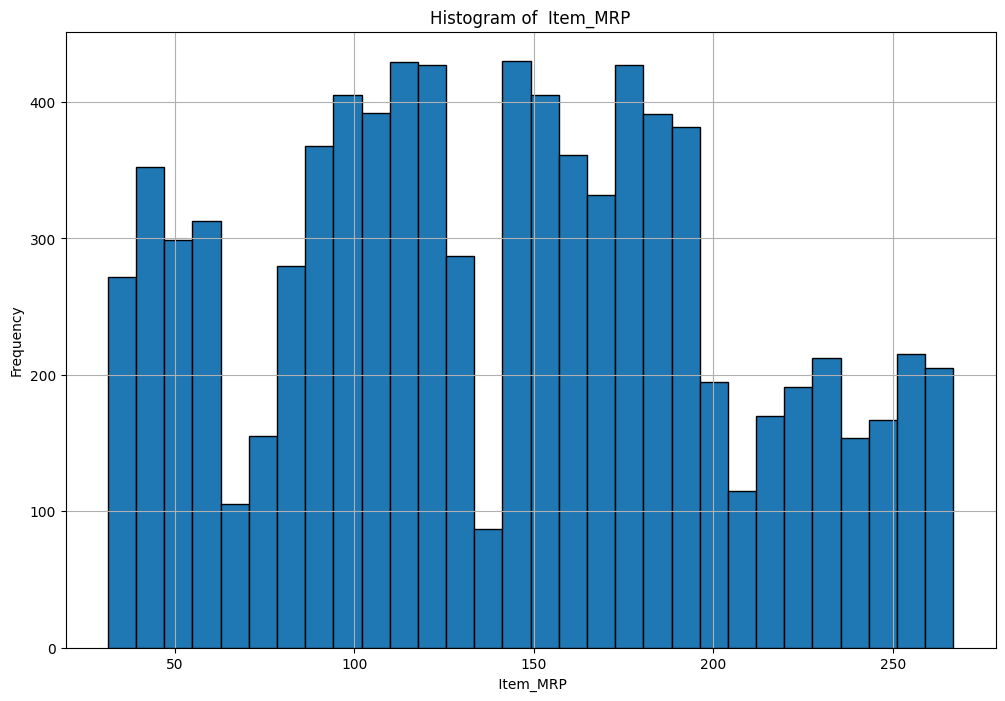

In [101]:
plt.figure(figsize=(12, 8))
# Create the histogram
ax = df["Item_MRP"].hist(bins=30, edgecolor='black')
plt.title(f'Histogram of {" Item_MRP"}')
plt.xlabel(" Item_MRP")
plt.ylabel('Frequency')
plt.show()


* Most items have an MRP within the range of 100-200, which could indicate this price range is popular or competitive in the market.

* Fewer items are priced very low (below 50) or very high (above 200), suggesting these price points might be less common or targeted towards niche markets.







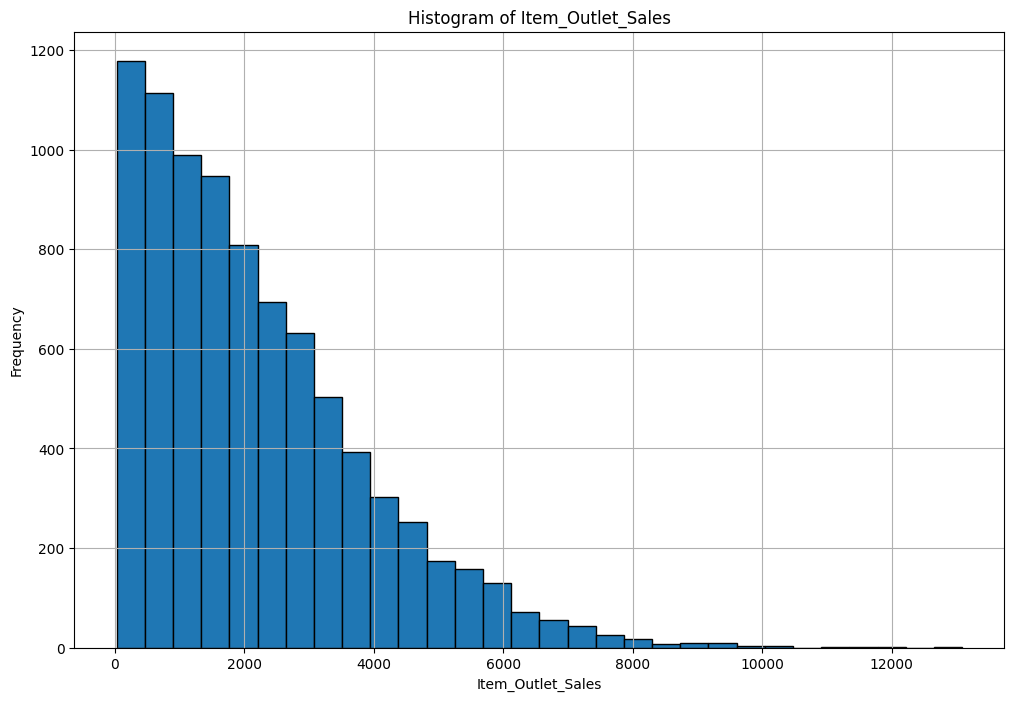

In [94]:
plt.figure(figsize=(12, 8))
# Create the histogram
ax = df["Item_Outlet_Sales"].hist(bins=30, edgecolor='black')
plt.title(f'Histogram of {"Item_Outlet_Sales"}')
plt.xlabel("Item_Outlet_Sales")
plt.ylabel('Frequency')
plt.show()



*  The majority of sales values fall between 0 and 3000, indicating that most products have relatively low sales.

*   There are fewer occurrences of very high sales, suggesting that only a few products achieve significantly high sales.



<ipython-input-95-ac3000b458c3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Item_Type", y="Item_Outlet_Sales", palette="Set2")


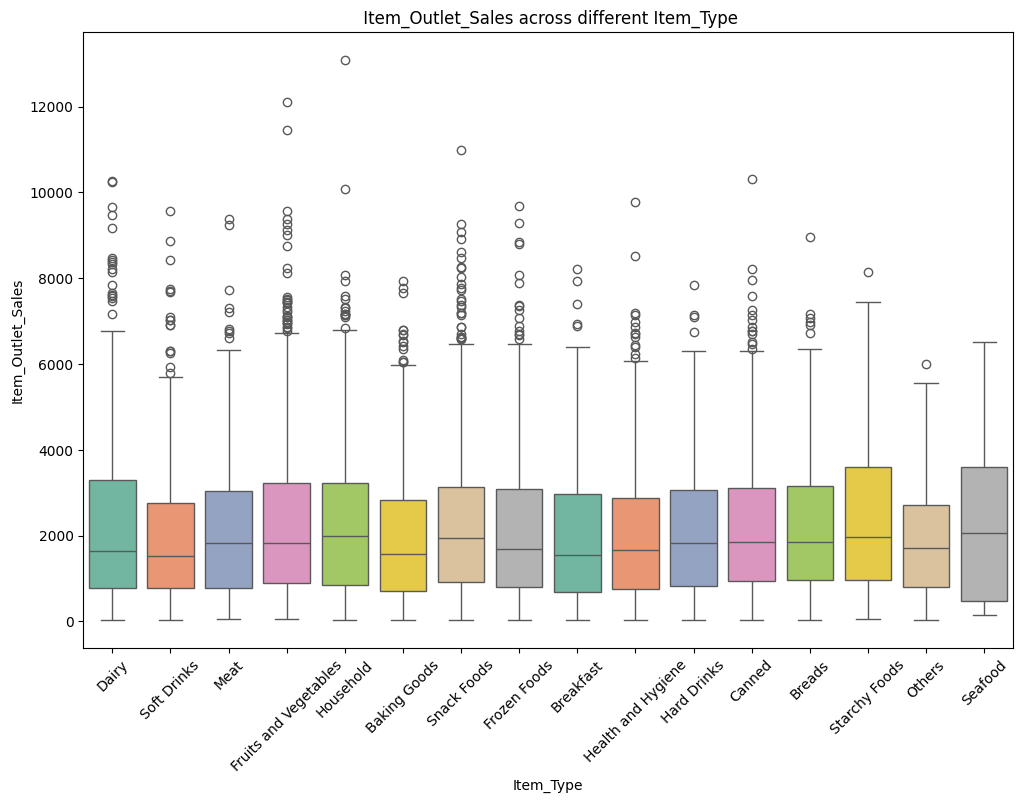

In [95]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x="Item_Type", y="Item_Outlet_Sales", palette="Set2")
plt.title(" Item_Outlet_Sales across different Item_Type")
plt.xticks(rotation=45)
plt.show();

* The median sales for each category are relatively similar, but there is
variability in the interquartile ranges.

* Some categories, such as Starchy Foods, Breads, and Seafood, show a wider spread, indicating greater variability in sales.

* Many categories have numerous outliers (small circles above the whiskers), indicating that certain products achieve significantly higher sales than others in the same category.

* This visualization helps identify which product types have more consistent sales and which have a higher chance of extreme sales fluctuations.

<ipython-input-96-72c0edb7e860>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Item_Type'], order=df['Item_Type'].value_counts().index, palette='viridis')


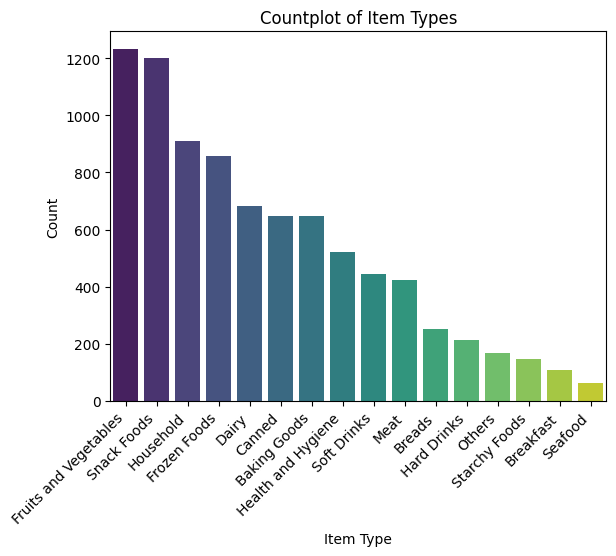

In [96]:
sns.countplot(x=df['Item_Type'], order=df['Item_Type'].value_counts().index, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Countplot of Item Types')
plt.xlabel('Item Type')
plt.ylabel('Count')
plt.show()



*   The store or dataset appears to have a strong focus on fresh produce ("Fruits and Vegetables") and convenience items like "Snack Foods."

*   Categories like "Seafood" and "Breakfast" items are less represented, suggesting they might be niche or less frequently purchased items in this context.

*   Household items are also a significant category, indicating a broad range of non-food essentials.







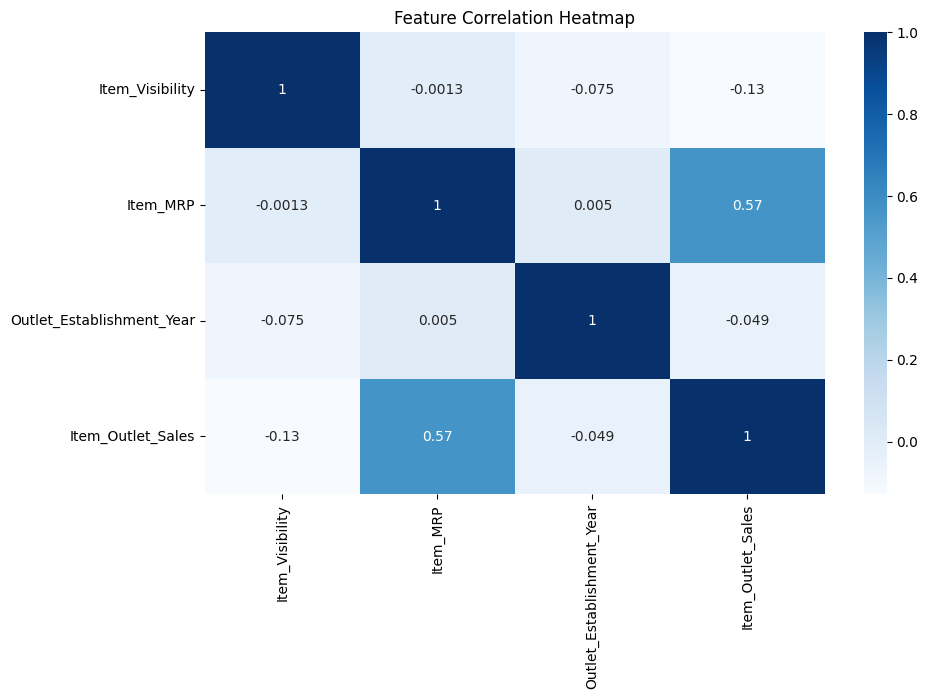

In [97]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='Blues')
plt.title('Feature Correlation Heatmap')
plt.show()





*  The most significant factor influencing Item_Outlet_Sales appears to be Item_MRP, indicating that pricing strategy plays a crucial role in sales performance.

*   Factors like Item_Weight, Item_Visibility, and Outlet_Establishment_Year have minimal impact on sales, based on this dataset.






